## Ejercicio 3

La codificación superdensa permite enviar dos bits clásicos a traves de un solo qubit. Este protocolo es muy similar a la teleportación cuántica, pero ahora Alice envía un qubit a Bob, en lugar de dos bits clásicos, y Bob es capaz de decodificar el mensaje usando el qubit recibido. 

Podría decirse que este protocolo es el "camino inverso" al del circuito  correspondiente a la teleportación cuántica.

In [6]:
# Cargamos el simulador local.
from braket.devices import LocalSimulator

sim = LocalSimulator("default")

Se define el circuito que se va a emplear para simular la codificación superdensa. En este caso vamos a enviar el mensaje '01'.

In [5]:
from braket.circuits import Circuit

def codificar_mensaje(circuito, mensaje):
    
    if mensaje[0] == '1':
        circuito.x(1)
    
    if mensaje[1] == '1':
        circuit.z(1)

    return circuito

# Se crea el par entrelazado.
circuit = Circuit().h(1).cnot(1, 0)

# Se codifica el mensaje a enviar. En este caso vamos a enviar '01'
codificar_mensaje(circuit, "01")

# Se decodifica el mensaje.
circuit.cnot(1, 0).h(1)

print("Profundidad:", circuit.depth)
print(circuit)


Profundidad: 5
T  : |0|1|2|3|4|
                
q0 : ---X---X---
        |   |   
q1 : -H-C-Z-C-H-

T  : |0|1|2|3|4|


Se realiza la simulación y se muestran los resultados.

Counter({'01': 1000})


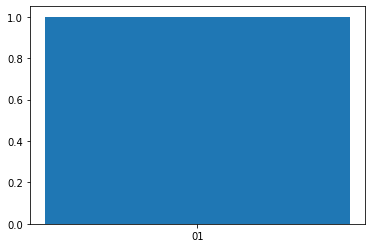

In [22]:
import matplotlib.pyplot as plt

counts = sim.run(circuit, shots=1000).result().measurement_counts


plt.bar(counts.keys(), [x / 1000.0 for x in counts.values()])
print(counts)

Vemos que, como hemos realizado la simulación sin ruido, el 100% de las veces medimos '01', que coincide con el mensaje que se quería enviar, por lo que el circuito funciona correctamente.

### Simulación con ruido

In [2]:
from braket.devices import LocalSimulator

sim = LocalSimulator("braket_dm")

Definimos el mismo circuito de antes, pero esta vez con ruido.

In [13]:
from braket.circuits import Circuit, Noise

# Se crea el par entrelazado.
circuit = Circuit().h(1).cnot(1, 0)

# Se codifica el mensaje a enviar. En este caso vamos a enviar '01'
codificar_mensaje(circuit, "01")


noise = Noise.BitFlip(0.1)
# Se decodifica el mensaje.
circuit.cnot(1, 0).h(1).apply_gate_noise(noise)
print("Profundidad:", circuit.depth)
print(circuit)

Profundidad: 5
T  : |    0    |    1    |    2    |    3    |    4    |
                                                        
q0 : -----------X-BF(0.1)-----------X-BF(0.1)-----------
                |                   |                   
q1 : -H-BF(0.1)-C-BF(0.1)-Z-BF(0.1)-C-BF(0.1)-H-BF(0.1)-

T  : |    0    |    1    |    2    |    3    |    4    |


Counter({'01': 614, '11': 276, '00': 80, '10': 30})


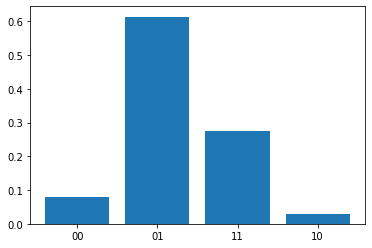

In [14]:
import matplotlib.pyplot as plt

counts = sim.run(circuit, shots=1000).result().measurement_counts


plt.bar(counts.keys(), [x / 1000.0 for x in counts.values()])
print(counts)

Vemos que con una fiabilidad de las puertas del 90% el circuito da resultados correctos aproximadamente un 60% de las veces. En este caso, los resultados incorrectos están divididos en 3 configuraciones distintas, por lo que es más facil dinstinguir los resultados correctos que en el caso de la teleportación cuántica.